In [73]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
import matplotlib.style
import matplotlib as mpl
import scipy
from math import erf

def parse_file(filepath):
    cont_area = [0]
    load_scale = [0]
    with open(filepath, "r") as log_file:
        for line in log_file:
            line = line.strip()
            if "Load scale:" in line:
                line = line.split()
                load_scale.append(float(line[5]))
            if "Active area:" in line:
                line = line.split()
                cont_area.append(float(line[5]) / float(line[8]))
    # print(load_scale, cont_area)
    return load_scale, cont_area

def plotting(area, load, Es, r, c, m, lab):
    plt.figure(1)
    l = len(area)
    plt.plot(load[0:l] / Es, area, color=c, marker=m, ms=8, lw=2, label=lab)
    p = np.linspace(min(load), max(load), 1000, endpoint=False)

    data = np.genfromtxt("/Users/ashvarts/Downloads/contact_mechanics/TENG_256_SW.mat/plot.csv", delimiter=',', skip_header=1)

    # print(np.shape(data))
    bem_result = np.zeros([len(data) + 1, 6])
    bem_result[1:len(bem_result), :] = data

    # print(bem_result)

    plt.plot(bem_result[:,1], bem_result[:,2], color='m', ls = "-.", lw=3, label="BEM (contact.engineering)")

    # data = np.loadtxt("/Users/ashvarts/JOSS/tamaas/examples/surf_256_4_32_0.1_cont_area")
    # plt.plot(load[0:l] / Es, data[0:l,1], color='r', ls = "--", lw=3, label="BEM (Tamaas), corrected")

    erfv = np.vectorize(erf)
    cont_area_persson = erfv(np.sqrt(2.) / r * p / Es)

    plt.plot(p / Es, cont_area_persson, color='k', ls = "--", lw = 3, label="Analytical (Persson)")

    


    # a = 2./ np.pi * np.arcsin(np.sqrt(p / p_star))
    # a1 = np.pi * pow(3./8. * p / p_star / np.pi, 2./3.)
    # plt.plot(p, a1, color="r", ls = "--", label="Analytical (1)")

    # if lab =="Full integration (6 GP)":
    #     data = np.loadtxt("/Users/ashvarts/mofem_install/um_release/tribology/test/rough_256/full_integ/rough_surf_256_cont_area.txt")
    #     plt.plot(load[0:l], data[0:l,0], color='k', ls = "-.", marker = 'o', ms=3, label="BEM")
    #     plt.plot(load[0:l], data[0:l,1], color='k', ls = "--", marker = 'o', ms=3, label="BEM corrected")
 
 

    # a2 = 1. - 3./2./np.pi * (1. - p / p_star)
    # plt.plot(p, a2, color="g", ls = "--", label="Analytical (2)")
    # for data, c, lab in zip(data_list, colors, labels):
    #     rate_mean = np.mean(data)
    #     plt.plot(np.arange(max_step_num), np.ones(max_step_num)*rate_mean, color=c, ls='--', lw = 2, label=None)
    # plt.plot(np.arange(max_step_num), np.ones(max_step_num)*2, color='k', ls=':', lw = 1, label=None)
    plt.legend()
    # plt.grid(

    plt.gca().set_xlim(left=0.0)
    plt.gca().set_ylim(bottom=0.0, top=1.0)
    # plt.savefig('contact_area_comp_surf.png')


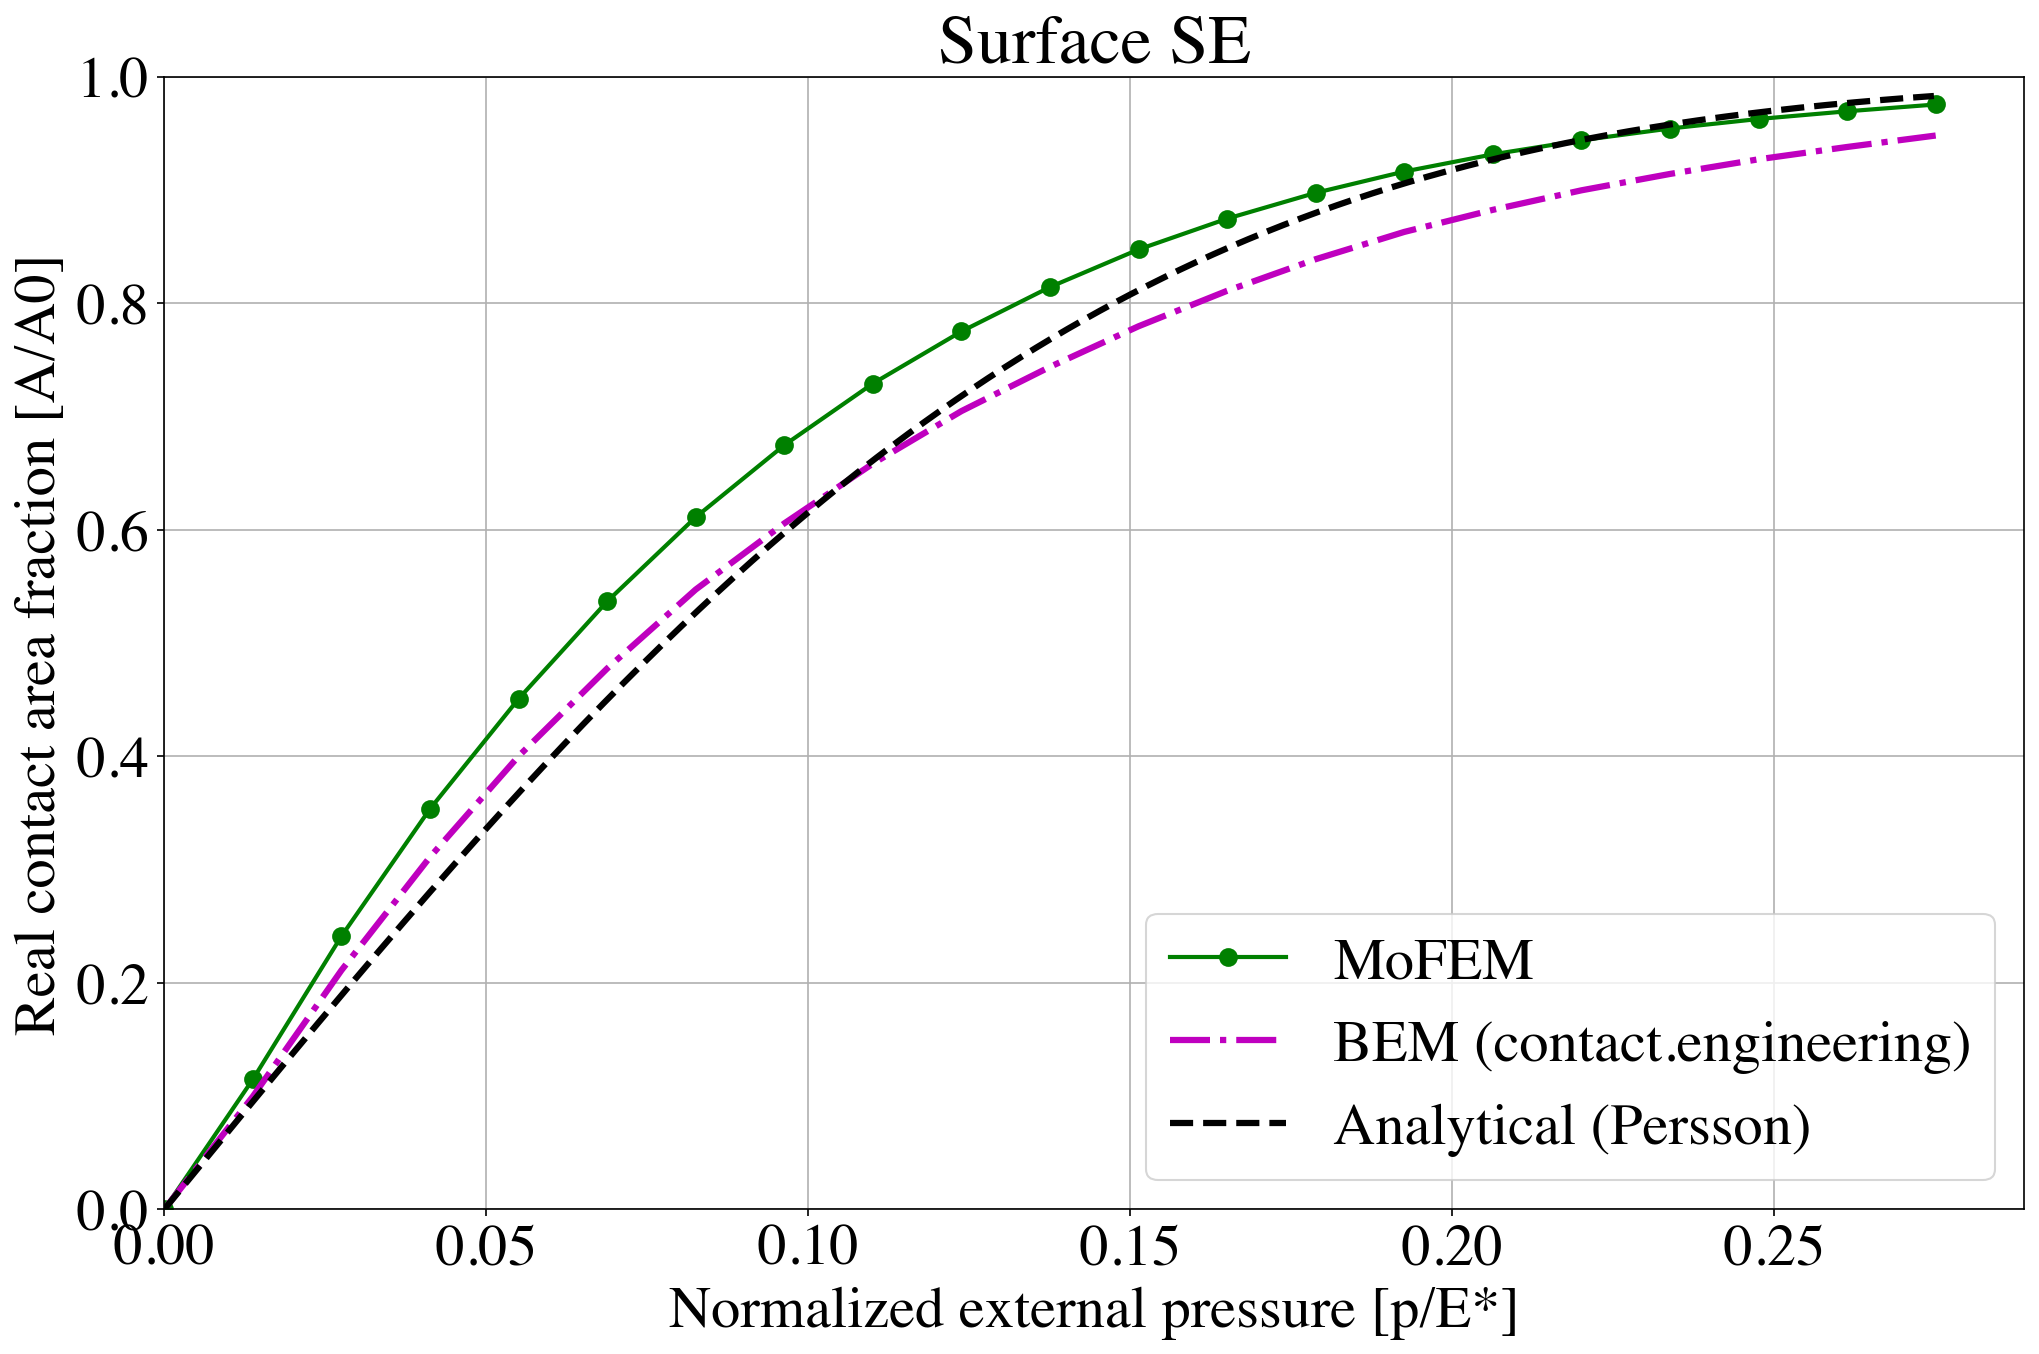

In [74]:
if __name__ == '__main__':
    
    # files = ["/Users/ashvarts/Tests/fracture/wedge_test/new_cut/press_ale/log", "/Users/ashvarts/Tests/fracture/wedge_test/new_cut/press_ale/log_1", 
    
    E = 1.5271
    nu = 0.4
    # d = 0.01
    # l = 2.0
    Es = E / (1 - nu*nu)
    # rms_slopes = [0.2, 0.23, 0.21, 0.21]
    rms_slopes = [0.2]
    # p_star = np.sqr(2.0) * np.pi * E_star * d / l

    # print(p_star)
    
    files = ["/Users/ashvarts/mofem_install/um_release/tribology/test/TENG/test_256/cn_5/surf_SW/log"] 
    #  "/Users/ashvarts/mofem_install/um_release/tribology/test/TENG/test_256/cn_5/surf_SE/log", "/Users/ashvarts/mofem_install/um_release/tribology/test/TENG/test_256/cn_5/surf_NE/log", "/Users/ashvarts/mofem_install/um_release/tribology/test/TENG/test_256/cn_5/surf_NW/log"]

    # files = ["/Users/ashvarts/mofem_install/um_release/tribology/test/rough_256/log_1e5"]
    colors = ['r', 'g', 'b', 'c']
    markers = ['o', 'd', 's', 'o']
    labels = ["MoFEM"]



    plt.rcParams['figure.figsize'] = [16, 10]
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = "Times"
    plt.rcParams['font.size'] = 28

    plt.figure(1)
    # plt.title("Contact area plot")
    plt.ylabel("Real contact area fraction [A/A0]")
    plt.xlabel("Normalized external pressure [p/E*]")

    plt.title("Surface SW")

    # plt.figure(2)
    # plt.title("Convergence plots")
    # plt.ylabel("Residual norm")
    # plt.xlabel("Iteration")

  
    for file, r, c, m, lab in zip(files, rms_slopes, colors, markers, labels):
        load_scale, cont_area = parse_file(file)
        # print(np.asarray(load_scale)/Es)
        # print(np.asarray(load_scale) / Es, cont_area)
        plotting(np.asarray(cont_area), np.asarray(load_scale), Es, r, c, m, lab)   
   
    plt.grid()
    plt.savefig("area_SW.png", bbox_inches='tight')
    
